In [28]:
# Guilherme Garcia Lima - 10409637

import pandas as pd
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv("MathE dataset (4).csv", sep=';', engine='python', encoding='latin-1')

In [7]:
print("Primeiras linhas:")
print(df.head())

print("\nInformações gerais:")
print(df.info())

Primeiras linhas:
   Student ID Student Country  Question ID  Type of Answer Question Level  \
0         647         Ireland           77               0          Basic   
1          41        Portugal           77               1          Basic   
2         340        Portugal           77               1          Basic   
3         641           Italy           77               0          Basic   
4         669        Portugal           77               1          Basic   

        Topic    Subtopic                                           Keywords  
0  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
1  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
2  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
3  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
4  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  

Informações gerais:
<class 'pandas.core.fram

In [31]:
df = df[["Question ID", "Question Level", "Topic", "Subtopic", "Keywords"]]

df = df.rename(columns={
    "Question ID": "question_id",
    "Question Level": "difficulty",
    "Topic": "topic",
    "Subtopic": "subtopic",
    "Keywords": "tags"
})

df["difficulty"] = df["difficulty"].str.lower()
df["topic"] = df["topic"].str.lower()
df["subtopic"] = df["subtopic"].str.lower()
df["tags"] = df["tags"].str.lower()

df["tags"] = df["tags"].apply(lambda x: [t.strip() for t in x.split(",")] if isinstance(x, str) else [])

print(df.head())
print(df.info())

   question_id difficulty       topic    subtopic  \
0           77      basic  statistics  statistics   
1           77      basic  statistics  statistics   
2           77      basic  statistics  statistics   
3           77      basic  statistics  statistics   
4           77      basic  statistics  statistics   

                                                tags  
0  [stem and leaf diagram, relative frequency, sa...  
1  [stem and leaf diagram, relative frequency, sa...  
2  [stem and leaf diagram, relative frequency, sa...  
3  [stem and leaf diagram, relative frequency, sa...  
4  [stem and leaf diagram, relative frequency, sa...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9546 entries, 0 to 9545
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   question_id  9546 non-null   int64 
 1   difficulty   9546 non-null   object
 2   topic        9546 non-null   object
 3   subtopic     9546 non-null   object

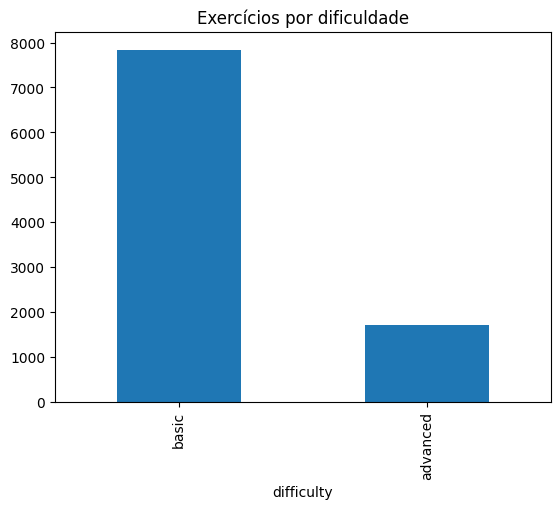

In [10]:
df["difficulty"].value_counts().plot(kind="bar")
plt.title("Exercícios por dificuldade")
plt.show()

In [32]:
def recomendar(df, tags_desejadas, dificuldade=None, n=5):
    tags_desejadas = [t.lower().strip() for t in tags_desejadas]

    subset = df.copy()

    if dificuldade:
        subset = subset[subset["difficulty"] == dificuldade.lower()]

    def score(row_tags):
        return len(set(row_tags) & set(tags_desejadas))

    subset["score"] = subset["tags"].apply(score)
    subset = subset[subset["score"] > 0]

    return subset.sort_values("score", ascending=False).head(n)

In [33]:
recomendar(df, ["trigonometric rules"], dificuldade="advanced", n=5)

,question_id,difficulty,topic,subtopic,tags,score
197,101,advanced,differentiation,derivatives,"[trigonometric rules, product rule, logarithmi...",1
7561,660,advanced,differentiation,derivatives,"[product rule, trigonometric rules, quotient r...",1
7802,727,advanced,differentiation,derivatives,"[trigonometric rules, product rule]",1
9118,1067,advanced,differentiation,partial differentiation,"[power rule, trigonometric rules, logarithmic ...",1
